In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Why do EDA
- Model Building 
- Analysis and reporting 
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

In [150]:
# Remember it is an iterative process

## Column Types
- Numerical - Age, Fare, Passengerid
- Categorical - Survived, Pclass, Sex, SibSp, Parch, Embarked
- Mixed - Name, Ticket, Cabin

## Univariate Analysis
Univariate analysis focuses on analyzing each feature in the dataset independently
- Distribution Analysis - The distribution of each feature is examined to identify its shape, central tendency, and dispersion 
- Identifying potential issues - Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

## The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:
- Normal Distribution: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.
- Skewed Distribution: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed)
- Bimodal Distribution: A distribution with two peaks or modes.
- Uniform Distribution: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.

## Dispersion is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data. 

There are several measures of dispersion, including:
- Range: The difference between the largest and smallest values in a data set.
- Variance: The average of the squared deviation of each value from the mean of the data set.
- Standard Deviation: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.
- Inter-quartile range (IQR): The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.

## Steps of doing Univariate Analysis on Numerical columns
- Descriptive Statistics: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.
- Visualizations: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.
- Identify Outliers: Identify and examine any outliers in the data. Outliers can be identified using visualizations, it is important to determine whether the outliers are due to measurement errors, data entry error, or legitimate differences in the data, and to decide whether to include or exclude them for the analysis.
- Skewness: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sentitive to skewness, if necessary.
- Conclusion: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

## Age
### Conclusions
- Age is normally (almost) distributed
- 20% of the values are missing
- There are some outliers

In [151]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

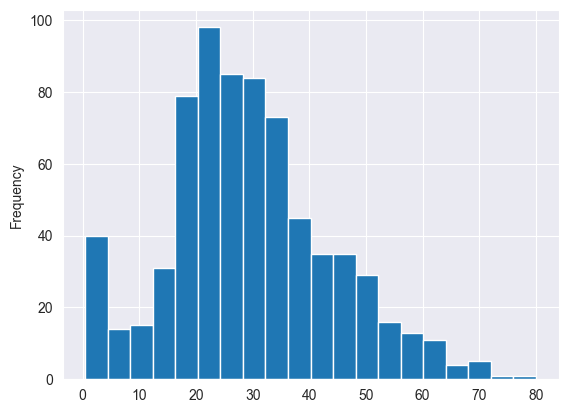

In [152]:
df['Age'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

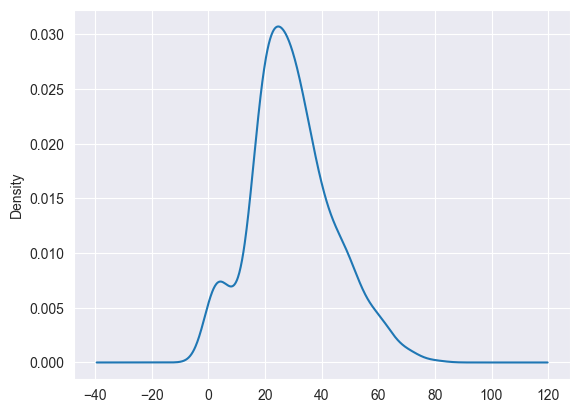

In [153]:
df['Age'].plot(kind='kde')

In [154]:
# If it is 0 or somewhere near 0 then it is Normally distributed
# If it was -ve then negatively distributed
df['Age'].skew()

0.38910778230082704

<Axes: >

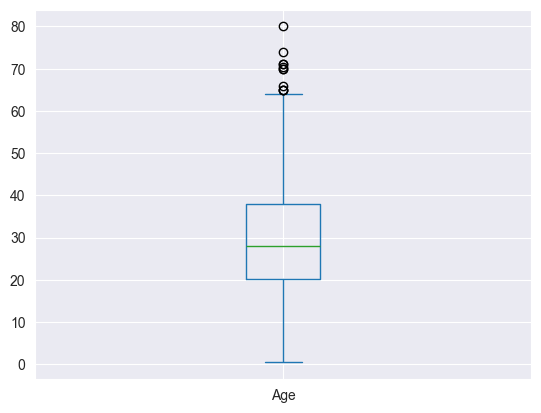

In [155]:
df['Age'].plot(kind='box')

In [156]:
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [157]:
df['Age'].isnull().sum() / len(df['Age'])

0.19865319865319866

### Fare column
conclusions
- The data is highly (positively) skewed
- Fare col actually contains the group fare and not the individual fare
(This could be an issue)
- We need to create a new col called individual fare

In [158]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

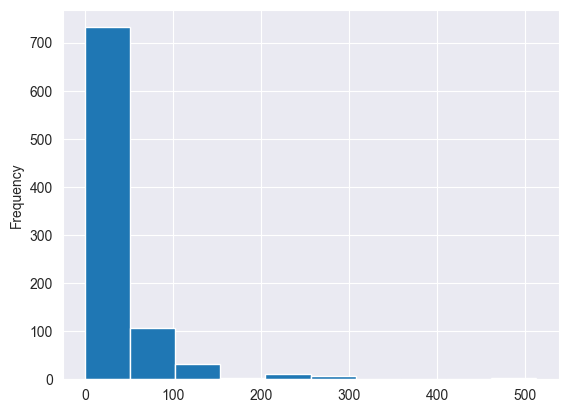

In [159]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

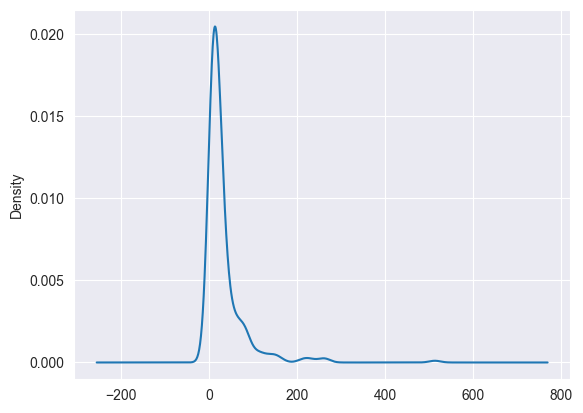

In [160]:
df['Fare'].plot(kind='kde')

In [161]:
# Highly positively skewed
df['Fare'].skew()

4.787316519674893

<Axes: >

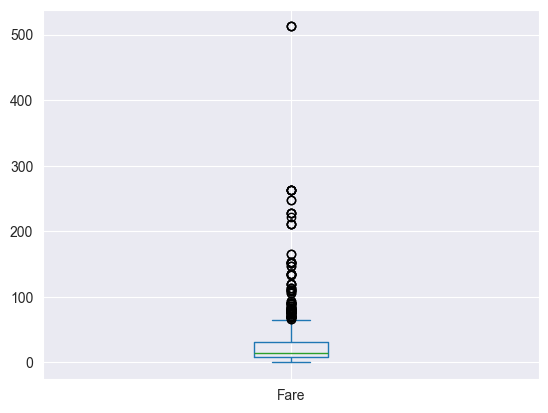

In [162]:
df['Fare'].plot(kind='box')

In [163]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [164]:
df['Fare'].isnull().sum()

0

## Steps of doing Univariate Analysis on Categorical Columns
- Descriptive Statistics: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.
- Visualizations: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.
- Missing Values: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.
- Conclusion: Summarize the findings of the EDA and make decision about how to proceed with the further analysis.

### Survived
conclusions
- More than 1/2 the people did not survive
- 

In [165]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

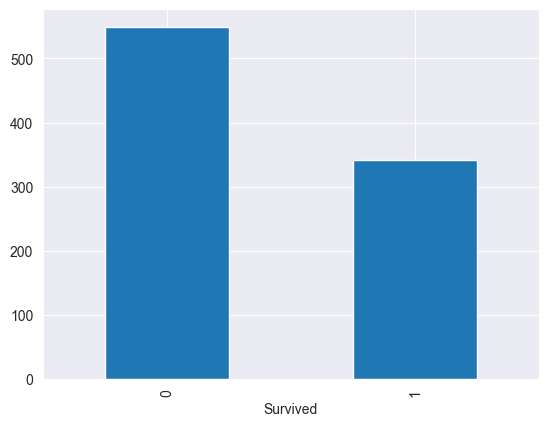

In [166]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

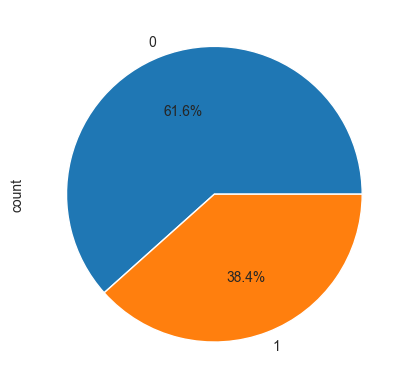

In [167]:
df['Survived'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [168]:
df['Survived'].isnull().sum()

0

### Pclass
**Conclusions**
- Surprisingly less people travelled in Pclass 2 and more people travelled in Pclass 1
- More than 50% people travelled in Pclass 3

In [169]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

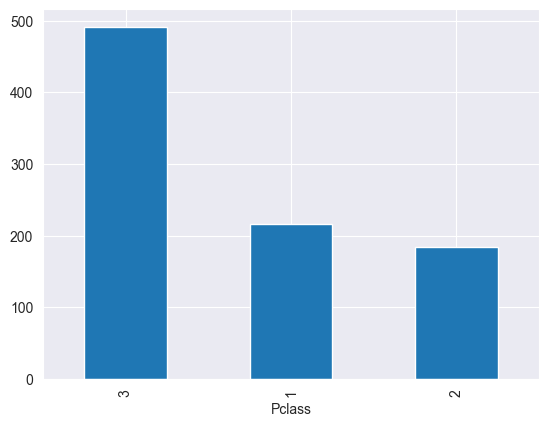

In [170]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

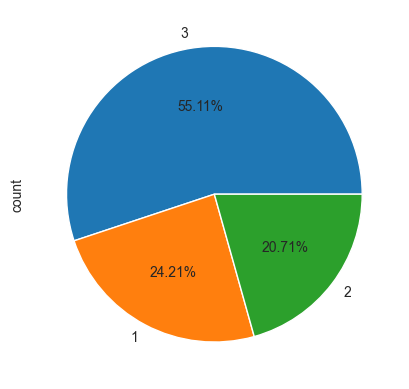

In [171]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%0.1f1%%')

## Sex

##### Conclusions 


- 

In [172]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

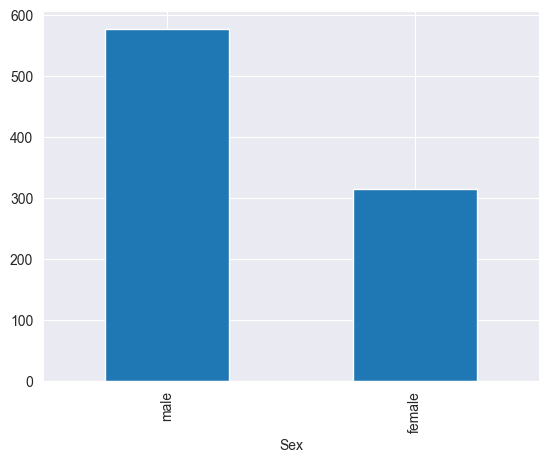

In [173]:
df['Sex'].value_counts().plot(kind='bar')

In [174]:
df['Sex'].isnull().sum()

0

## SibSp


In [175]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

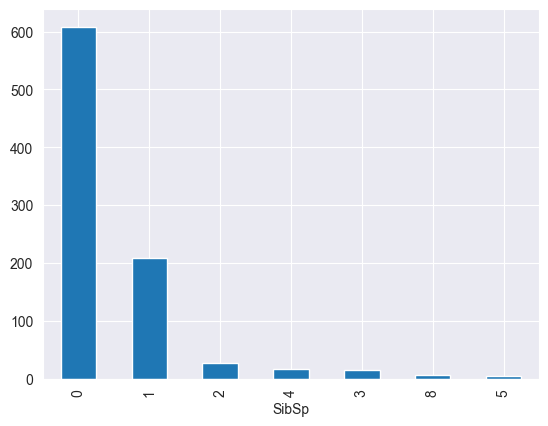

In [176]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

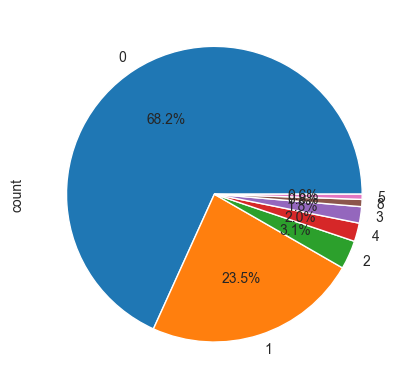

In [177]:
df['SibSp'].value_counts().plot(kind='pie', autopct='%0.1f%%')

## Parch

- Parch and SibSp cols can be merged to form a new col called 'family size'
- Create a new col called is_alone

In [178]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

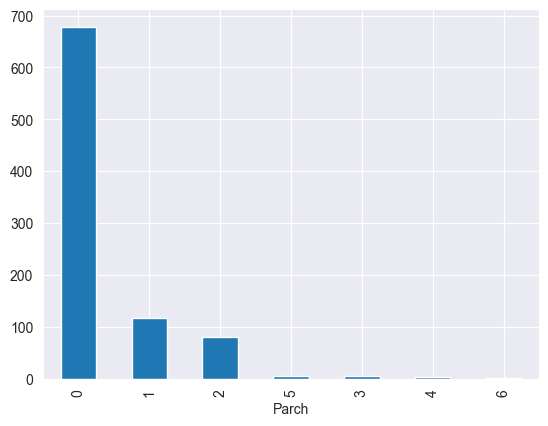

In [179]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

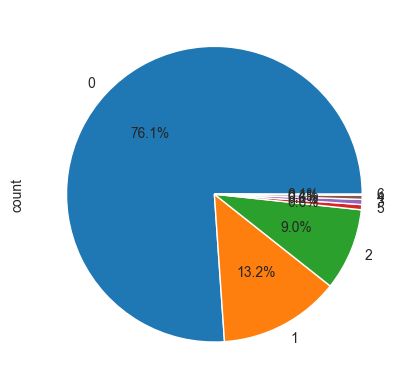

In [180]:
df['Parch'].value_counts().plot(kind='pie', autopct='%0.1f%%')

## Embarked 



In [181]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

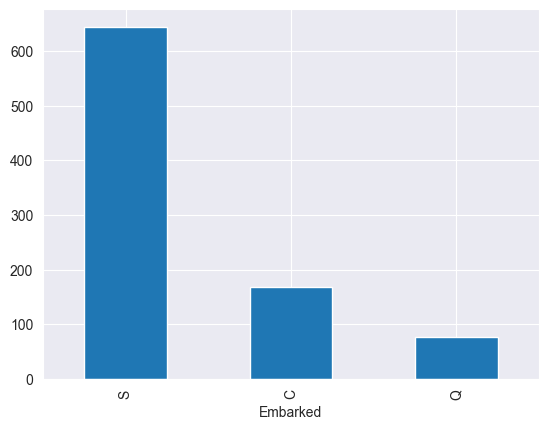

In [182]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

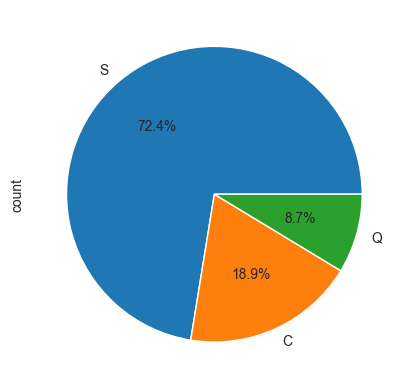

In [183]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%0.1f%%')

## Mixed Cols
- Need to feature engineer more cols to get insights

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

## Survived with categorical cols
## Survived and Pclass

- It was risky to travel on Pclass 3 and Pclass 1 people's survival rate was higher

In [184]:
# in normalize you can give index, columns, or True
print(pd.crosstab(df['Survived'], df['Pclass'], normalize='columns') * 100)

Pclass            1          2          3
Survived                                 
0         37.037037  52.717391  75.763747
1         62.962963  47.282609  24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

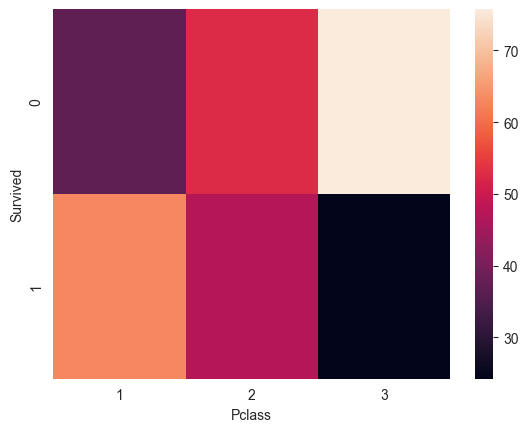

In [185]:
sns.heatmap(pd.crosstab(df['Survived'], df['Pclass'], normalize='columns') * 100)

## Survived and Sex
- female survival rate was more

In [186]:
print(pd.crosstab(df['Survived'], df['Sex'], normalize='columns') * 100)

Sex          female       male
Survived                      
0         25.796178  81.109185
1         74.203822  18.890815


## Survived and Embarked


In [187]:
print(pd.crosstab(df['Survived'], df['Embarked'], normalize='columns') * 100)

Embarked          C          Q          S
Survived                                 
0         44.642857  61.038961  66.304348
1         55.357143  38.961039  33.695652


In [188]:
# Many people survived when they boarded the train from station "C" 
# Is it because of gender?
print(pd.crosstab(df['Sex'], df['Embarked'], normalize='columns') * 100)

# No, not because of the gender

Embarked          C          Q          S
Sex                                      
female    43.452381  46.753247  31.521739
male      56.547619  53.246753  68.478261


In [189]:
# Is it because they belong to Pclass 1
# Yes, Many people boarding from station C belong to Pclass 1

print(pd.crosstab(df['Pclass'], df['Embarked'], normalize='columns') * 100)

Embarked          C          Q          S
Pclass                                   
1         50.595238   2.597403  19.720497
2         10.119048   3.896104  25.465839
3         39.285714  93.506494  54.813665


## Survived with numerical
## Survived and Age

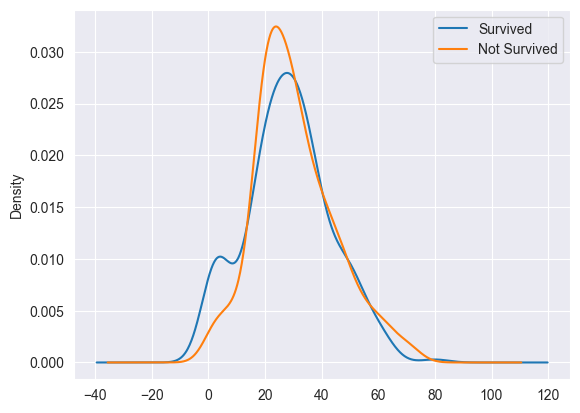

In [190]:
df[df['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde', label='Not Survived')

plt.legend()
plt.show()

In [191]:
df[df['Pclass'] == 1]['Age'].mean()

38.233440860215055

## Feature Engineering (Data Rectifying) 
Fare Column
- it should be individual fare and should not be a group fare (family fare)

In [192]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [193]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [194]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [195]:
69.55 / 11

6.322727272727272

In [196]:
df[df['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [197]:
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [198]:
df1 = pd.read_csv('test.csv')
titanic = pd.concat([df, df1])

In [199]:
titanic[titanic['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [200]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [201]:
titanic['individual_fare'] = titanic['Fare'] / (titanic['SibSp'] + titanic['Parch'] + 1)
titanic['individual_fare']

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Name: individual_fare, Length: 1309, dtype: float64

<Axes: >

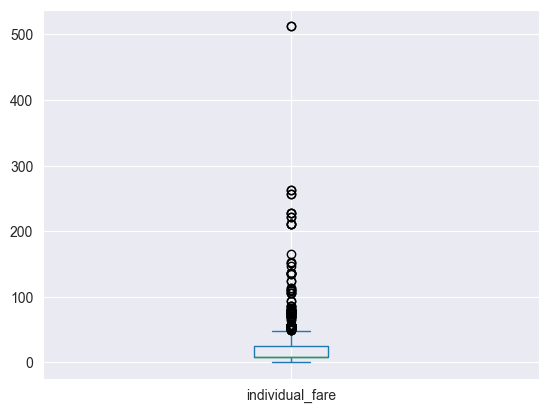

In [202]:
titanic['individual_fare'].plot(kind='box')

In [203]:
titanic[['individual_fare', 'Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


## SibSp and Parch cols

In [204]:
titanic['family_size'] = titanic['SibSp'] + titanic['Parch'] + 1

In [205]:
# New col family_type
# 1 -> alone
# 2 - 4 -> small
# >5 -> large

def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif 1 < num < 5:
        return 'small'
    else:
        return 'large'

In [206]:
titanic['family_type'] = titanic['family_size'].apply(transform_family_size)

In [207]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone


## Survived and family_type

In [208]:
print(pd.crosstab(titanic['Survived'], titanic['family_type'], normalize='columns') * 100)

family_type      alone      large      small
Survived                                    
0.0          69.646182  83.870968  42.123288
1.0          30.353818  16.129032  57.876712


## Name col

In [209]:
titanic['surname'] = titanic['Name'].str.split(',').str.get(0)

In [210]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,alone,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,alone,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,alone,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,alone,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,alone,Ware


In [211]:
titanic['title'] = titanic['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [212]:
print(titanic['title'].value_counts())

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64


In [213]:
titanic['title'] = titanic['title'].str.replace(r'Rev\.|Dr\.|Col\.|Major\.|Don\.|Capt\.|the|Jhonkeer\.', 'other',
                                                regex=True)

In [214]:
print(titanic['title'].value_counts())

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
other         25
Ms.            2
Mlle.          2
Mme.           1
Lady.          1
Sir.           1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64


In [215]:
# Define a mapping to standardize titles
title_mapping = {
    'Ms.': 'Miss.',
    'Mlle.': 'Miss.',
    'Mme.': 'Mrs.',
    'Lady.': 'Mrs.',
    'Sir.': 'other',
    'Dona.': 'Mrs.',
    'Don.': 'other',
}

# Apply the mapping to the 'title' column
titanic['title'] = titanic['title'].replace(title_mapping)


In [218]:
temp_df = titanic[titanic['title'].isin(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'other'])]

In [220]:
pd.crosstab(temp_df['Survived'], temp_df['title'], normalize='columns') * 100

title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,42.5,29.72973,84.332689,20.472441,66.666667
1.0,57.5,70.27027,15.667311,79.527559,33.333333


## Cabin col

In [222]:
titanic['Cabin'].isnull().sum() / len(titanic['Cabin'])

0.774637127578304

In [225]:
print(titanic['Cabin'].value_counts().head(15))

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
F2                 4
B96 B98            4
C78                4
F4                 4
D                  4
E34                3
B58 B60            3
A34                3
E101               3
C101               3
Name: count, dtype: int64


In [226]:
titanic['Cabin'].fillna('M', inplace=True)

C:\Users\15105\AppData\Local\Temp\ipykernel_11684\2811324373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Cabin'].fillna('M', inplace=True)


In [227]:
titanic['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
                   ... 
A14                   1
E63                   1
E12                   1
E38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [228]:
titanic['deck'] = titanic['Cabin'].str[0]

In [230]:
titanic['deck'].value_counts()

deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [233]:
pd.crosstab(titanic['deck'], titanic['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='deck'>

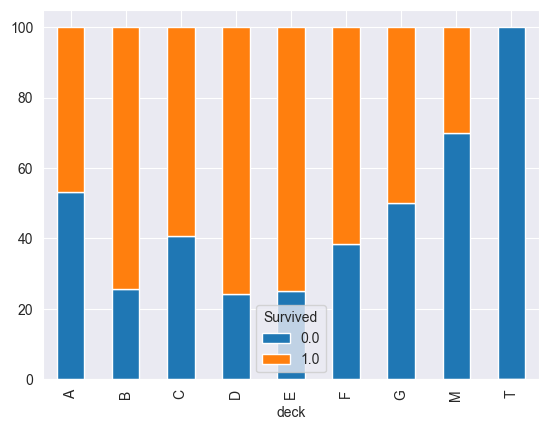

In [237]:
round(pd.crosstab(titanic['deck'], titanic['Survived'],  normalize='index') * 100, 2).plot(kind='bar', stacked=True)

## Multivariate

In [239]:
titanic.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,individual_fare,family_size
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428,0.035365,-0.031437
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.221600,0.016639
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.504270,0.050027
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.193545,-0.240229
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.089807,0.861952
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.065498,0.792296
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000,0.832029,0.226492
individual_fare,0.035365,0.221600,-0.504270,0.193545,-0.089807,-0.065498,0.832029,1.000000,-0.094874
family_size,-0.031437,0.016639,0.050027,-0.240229,0.861952,0.792296,0.226492,-0.094874,1.000000


<Axes: >

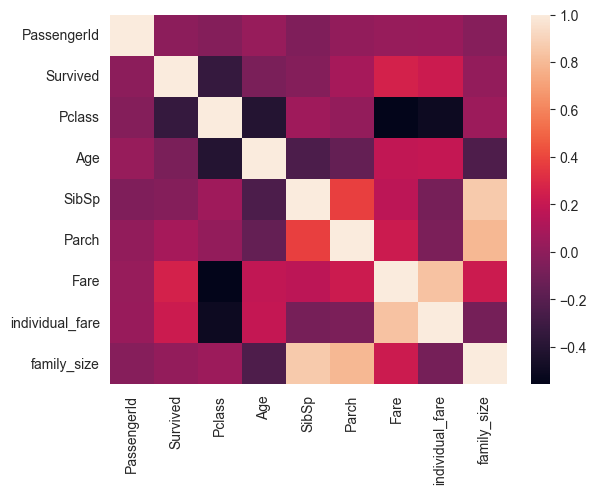

In [240]:
sns.heatmap(titanic.corr(numeric_only=True))

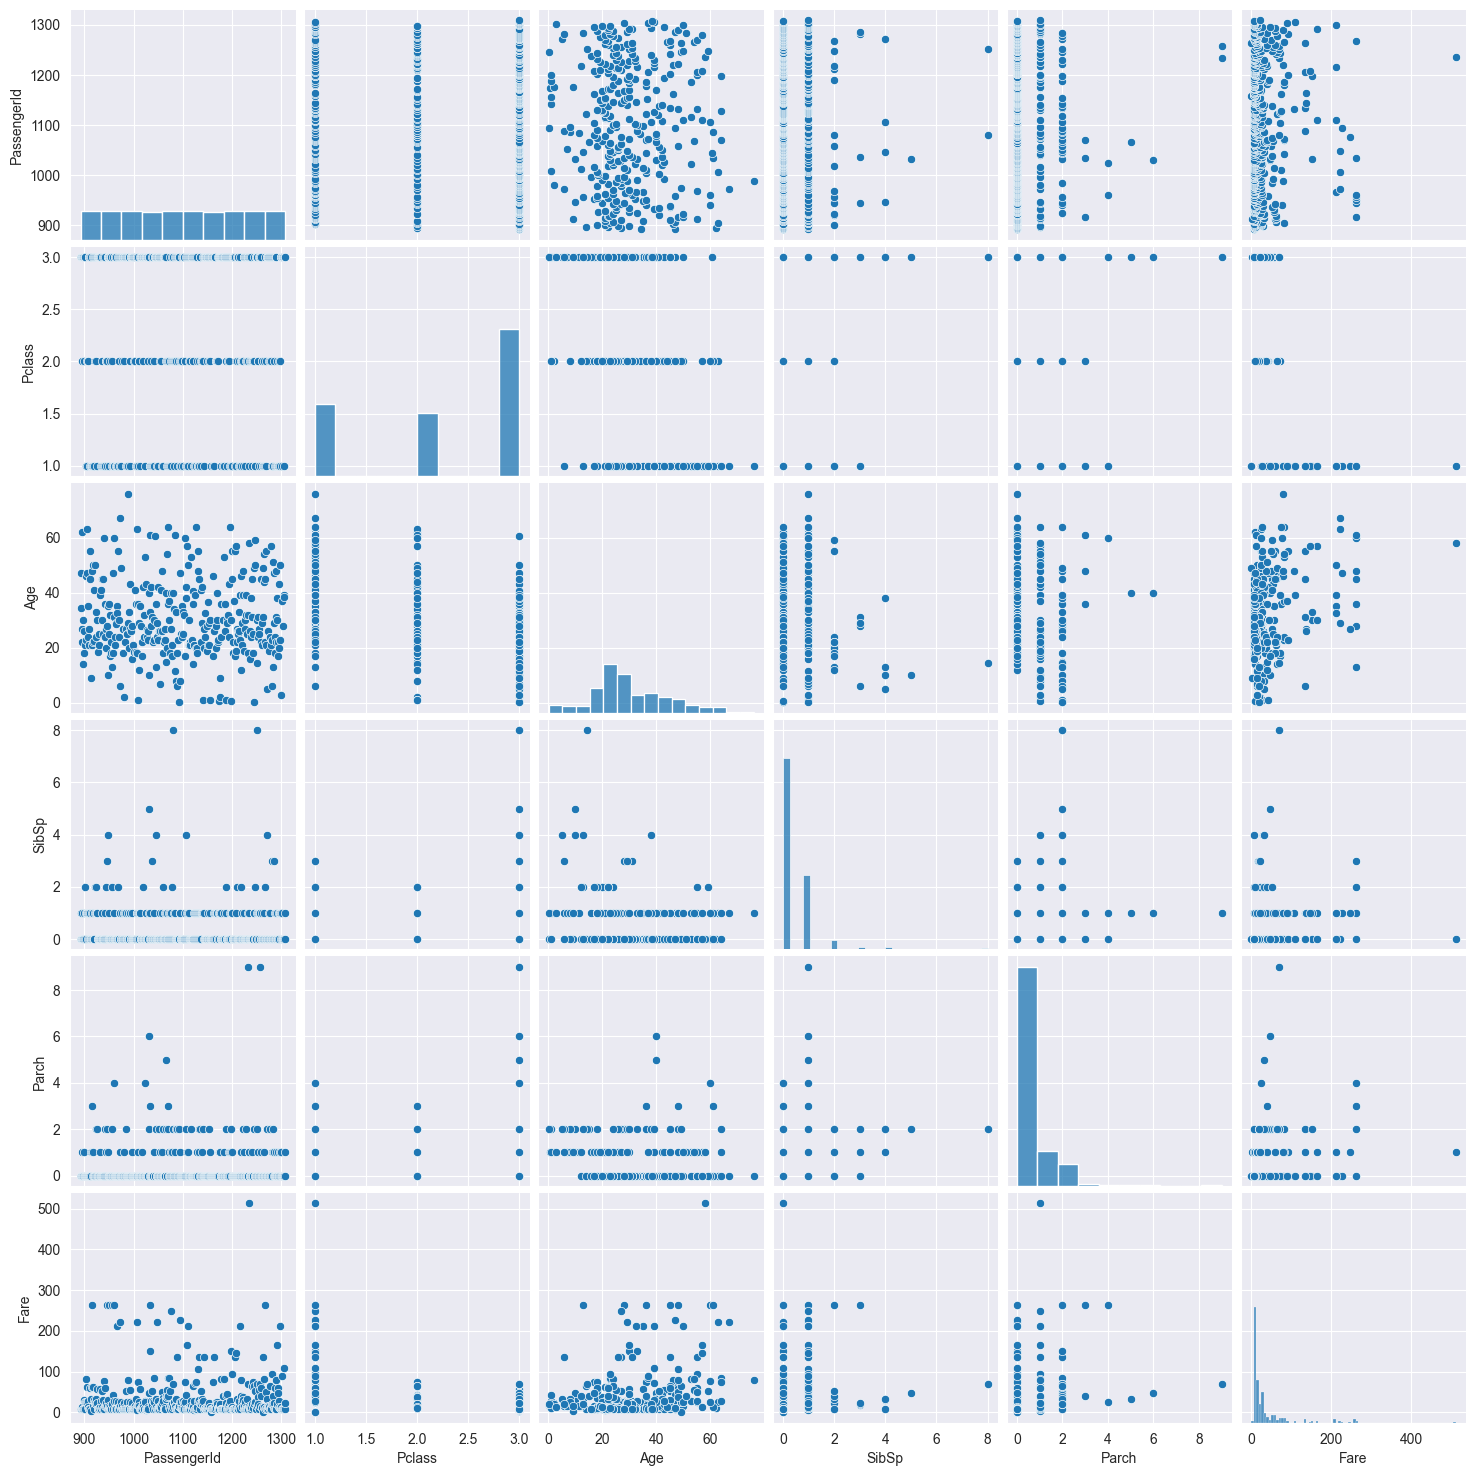

In [242]:
sns.pairplot(df1)